In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cov-State correlation

In [30]:
df = pd.read_csv('ga_scores.txt', sep="\t")
df.head()

,application,agent,coverage,states
0,org.moire.opensudoku,"[0, 0, 0, 1, 1, 1, 1, 1, 1]",11.0,8
1,org.moire.opensudoku,"[1, 0, 0, 1, 0, 0, 0, 0, 1]",10.0,4
2,org.moire.opensudoku,"[0, 0, 0, 1, 1, 0, 0, 1, 1]",10.0,4
3,org.moire.opensudoku,"[0, 1, 1, 0, 1, 1, 1, 0, 0]",11.0,4
4,org.moire.opensudoku,"[0, 0, 0, 1, 1, 1, 1, 0, 0]",11.0,7


In [33]:
for app in df['application'].drop_duplicates():
    print(app)

org.moire.opensudoku
com.dozingcatsoftware.bouncy
ch.logixisland.anuto
de.tobiasbielefeld.solitaire
protect.card_locker
com.ihunda.android.binauralbeat
org.transdroid.search
com.tachibana.downloader
org.secuso.privacyfriendlynetmonitor


In [24]:
df = df.groupby('application').transform(lambda x: (x - x.mean()) / x.std())
df

,coverage,states
0,-0.342027,0.601999
1,-0.470287,-1.097763
2,-0.470287,-1.097763
3,-0.342027,-1.097763
4,-0.342027,0.177059
...,...,...
112,0.598252,1.125212
113,-1.184774,0.538145
114,0.832861,-0.048922
115,0.832861,-0.635989


In [25]:
from scipy.stats import spearmanr
# df.corr(method="spearman")
spearmanr(df)

SpearmanrResult(correlation=0.43808854963135324, pvalue=7.820229998023591e-07)

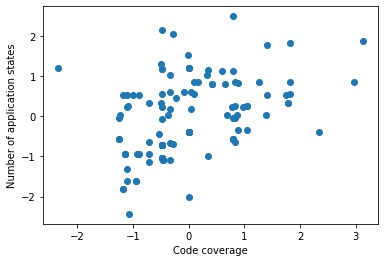

In [361]:
plt.ylabel('Number of application states')
plt.xlabel('Code coverage')
plt.scatter(df['coverage'], df['states'])

## Genetic Algorithm benchmark

In [369]:
ga_tools = pd.read_csv('ga_benchmark_tools.txt', sep='\t')
ga_tools.head()

,application,agent,coverage,states
0,com.smart.consumer.app,"[0, 1, 1, 1, 0, 1, 0, 1, 0]",0,7
1,com.smart.consumer.app,"[0, 0, 1, 1, 1, 1, 0, 1, 0]",0,9
2,com.smart.consumer.app,"[1, 0, 1, 0, 1, 1, 1, 0, 0]",0,9
3,com.smart.consumer.app,"[0, 0, 0, 1, 1, 1, 1, 0, 0]",0,8
4,com.smart.consumer.app,"[1, 0, 1, 0, 1, 1, 0, 1, 0]",0,8


In [370]:
ga_edu = pd.read_csv('ga_benchmark_edu.txt', sep='\t')
ga_edu.head()

,application,agent,coverage,states
0,co.brainly,"[1, 1, 1, 0, 1, 0, 1, 0, 0]",0,2
1,co.brainly,"[0, 1, 0, 1, 1, 0, 1, 1, 0]",0,2
2,co.brainly,"[0, 0, 1, 1, 0, 0, 0, 1, 0]",0,2
3,co.brainly,"[1, 0, 1, 0, 1, 0, 1, 1, 1]",0,4
4,co.brainly,"[1, 0, 1, 0, 1, 0, 1, 0, 0]",0,2


In [371]:
tools_stat = ga_tools.groupby('application').max()
tools_stat.head()

,agent,coverage,states
application,,,
app.intra,"[1, 1, 1, 0, 0, 1, 0, 1, 1]",0,11
app.quantum.supdate,"[1, 1, 1, 0, 1, 0, 0, 0, 0]",0,-1
club.ultracleaner.pro,"[1, 1, 1, 1, 0, 1, 1, 1, 0]",0,12
com.adaranet.android.droidproxyclient2,"[1, 1, 1, 1, 1, 1, 0, 0, 1]",0,-1
com.allvideo.downloader.instantsaver,"[1, 0, 0, 1, 1, 0, 1, 1, 0]",0,-1


In [372]:
rules_name = ['ViewPager','ImageButton','ActionBar','SkipButton','RandomTouch','RandomClickElement','FillTextFields','LoopThroughMenu','RandomBack',]

In [380]:
def get_stat(filename):
    ga_stat = pd.read_csv(filename, sep='\t')
    ga_stat = ga_stat.groupby('application').max()
    ga_stat = ga_stat[ga_stat.states != -1]
    return ga_stat

def rule_dist(filename, title=None):
    if not title:
        title = filename
    ga_stat = get_stat(filename)
    rules = np.array([0] * 9)
    for agent in ga_stat['agent']:
        rules += np.array(eval(agent))
    plt.figure(figsize=(15, 4))
    plt.ylabel('Application Count')
    plt.title(title)
    plt.bar(rules_name, rules)
    plt.show()

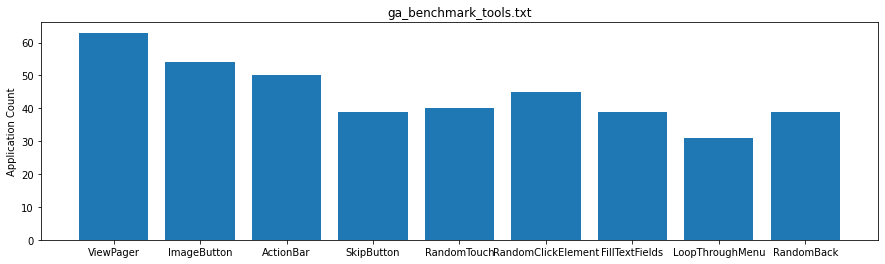

In [381]:
rule_dist('ga_benchmark_tools.txt')

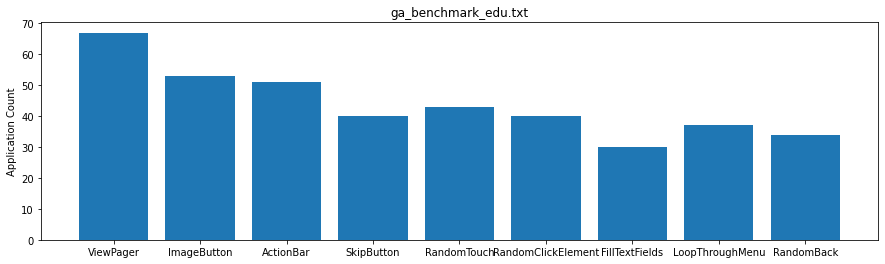

In [382]:
rule_dist('ga_benchmark_edu.txt')

เลือก top 5 rules เทียบกับ Mankey ด้วยจำนวน state (แยกหมวด + รวมหมวด)

In [31]:
working_app_list = list(pd.concat([get_stat('ga_benchmark_tools.txt'), get_stat('ga_benchmark_edu.txt')]).index)
import random
random.shuffle(working_app_list)
with open('example_apps.txt', 'w') as fp:
    fp.write('\n'.join(working_app_list))

## Models Comparison

In [98]:
result = pd.read_csv('model_comparison.txt', sep='\t')
result
result.time = result.apply(lambda row: row.time - 147 if row['mode'] == 'mankey' else row.time, axis=1)
result


,application,mode,states,score,time
0,ru.zdevs.zarchiver,mankey,9,0.0,774.215777
1,ru.zdevs.zarchiver,ga,9,0.0,194.168052
2,org.plantnet,mankey,11,0.0,82.406327
3,org.plantnet,ga,10,0.0,99.792145
4,com.adsk.sketchbook,mankey,4,0.0,312.717294
...,...,...,...,...,...
101,com.teacapps.barcodescanner,ga,15,-1.0,295.809376
102,com.vid.vidman,mankey,4,-1.0,126.727928
103,com.vid.vidman,ga,5,-1.0,75.171217
104,com.google.android.apps.chromecast.app,mankey,7,-1.0,251.860468


In [99]:
apps = result['application'].drop_duplicates()
real_apps = apps
with open('example_apps.txt', 'w') as fp:
    fp.write('\n'.join(apps))


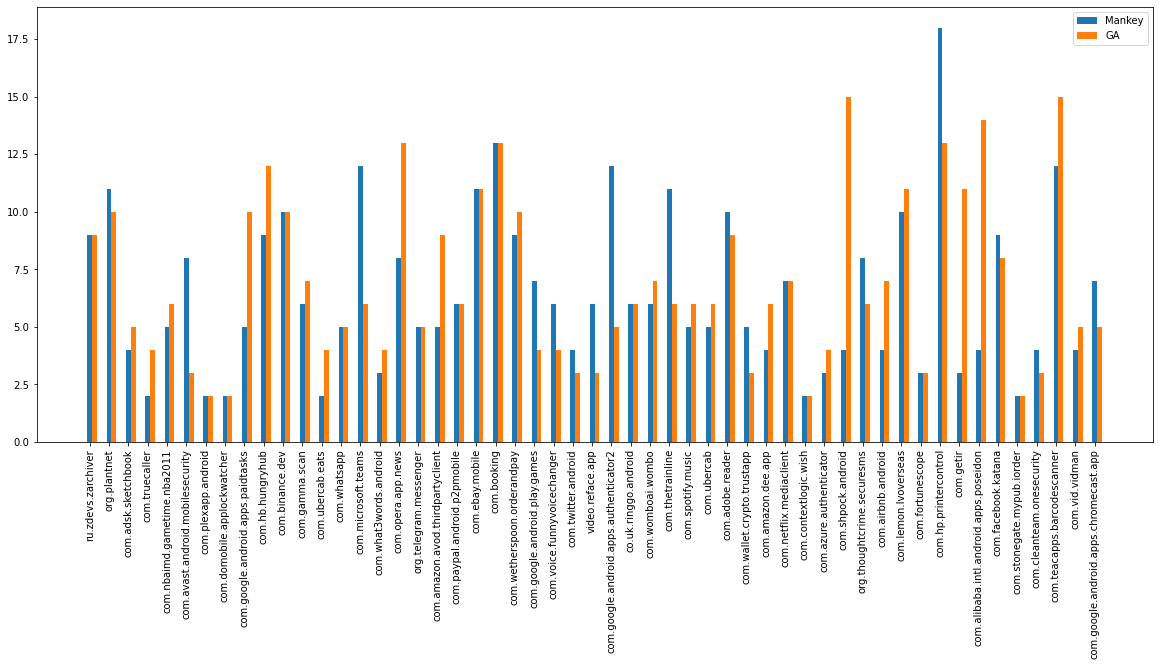

In [100]:
# result = result.head(120)
apps = result['application'].drop_duplicates()
plt.figure(figsize=(20, 8))
X = np.arange(53)
plt.bar(X + 0.00, result[result['mode'] == 'mankey']['states'], width=0.25)
plt.bar(X + 0.25, result[result['mode'] == 'ga']['states'], width=0.25)
plt.xticks(X, apps, rotation='vertical')
plt.legend(labels=['Mankey', 'GA'])
plt.show()

In [101]:
for app in apps:
    print(app)

ru.zdevs.zarchiver
org.plantnet
com.adsk.sketchbook
com.truecaller
com.nbaimd.gametime.nba2011
com.avast.android.mobilesecurity
com.plexapp.android
com.domobile.applockwatcher
com.google.android.apps.paidtasks
com.hb.hungryhub
com.binance.dev
com.gamma.scan
com.ubercab.eats
com.whatsapp
com.microsoft.teams
com.what3words.android
com.opera.app.news
org.telegram.messenger
com.amazon.avod.thirdpartyclient
com.paypal.android.p2pmobile
com.ebay.mobile
com.booking
com.wetherspoon.orderandpay
com.google.android.play.games
com.voice.funnyvoicechanger
com.twitter.android
video.reface.app
com.google.android.apps.authenticator2
co.uk.ringgo.android
com.womboai.wombo
com.thetrainline
com.spotify.music
com.ubercab
com.adobe.reader
com.wallet.crypto.trustapp
com.amazon.dee.app
com.netflix.mediaclient
com.contextlogic.wish
com.azure.authenticator
com.shpock.android
org.thoughtcrime.securesms
com.airbnb.android
com.lemon.lvoverseas
com.fortunescope
com.hp.printercontrol
com.getir
com.alibaba.intl.andr

In [103]:
df = pd.read_csv('tracking.txt', sep="\t")
history = df.history.str.split(',', expand=True).astype(float)
df

,app,method,history
0,ru.zdevs.zarchiver,mankey,"95.54562282562256,100.26564574241638,112.29468..."
1,ru.zdevs.zarchiver,ga,"23.400795936584473,28.462110996246338,33.31227..."
2,org.plantnet,mankey,"102.53828883171082,105.87917804718018,108.4653..."
3,org.plantnet,ga,"24.60118293762207,29.09934902191162,36.1289510..."
4,com.adsk.sketchbook,mankey,"100.69294595718384,102.56225490570068,104.7974..."
...,...,...,...
101,com.teacapps.barcodescanner,ga,"23.21724009513855,26.619557857513428,28.788508..."
102,com.vid.vidman,mankey,"140.13297295570374,143.80116510391235,195.6308..."
103,com.vid.vidman,ga,"31.51500916481018,37.892143964767456,53.554778..."
104,com.google.android.apps.chromecast.app,mankey,"109.23867630958557,110.99156713485718,113.2960..."


In [104]:
df = pd.concat([df, history], axis=1)
df.drop('history', inplace=True, axis=1)
df.dropna(thresh=3, inplace=True)
df.head()

,app,method,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,ru.zdevs.zarchiver,mankey,95.545623,100.265646,112.294684,154.698662,172.032621,175.596094,188.375423,192.197832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ru.zdevs.zarchiver,ga,23.400796,28.462111,33.312279,35.623623,40.810495,43.467617,136.668408,156.630161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,org.plantnet,mankey,102.538289,105.879178,108.465354,110.879942,113.089879,123.757972,128.708911,141.021194,161.208868,163.92594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,org.plantnet,ga,24.601183,29.099349,36.128951,37.478943,49.838454,52.121619,71.088669,72.420010,97.744193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,com.adsk.sketchbook,mankey,100.692946,102.562255,104.797480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0.06004682231794221
0.12304661761717575
0.08345610247618833
0.08309147237210353
0.08404455340135897
0.4887553344494807
inf
inf
0.018500408403696753
0.025652963411384982
0.10896103001669483
0.013131505733179526
0.03436194203617878
0.023644912561239864
0.26409451294068176
0.2794347716555801
0.020947527940891907
0.09935457488674868
0.07333631277665406
0.08764056902414022
0.04153399827428942
0.10662167403354955
0.08081279058536416
0.04766905842021673
0.11395131778742612<ipython-input-136-14ec2efe35c0>:15: RuntimeWarning: divide by zero encountered in double_scalars
  return (len(mk) / (mk[-1] - mk[0]), len(ga) / (ga[-1] - ga[0]))

0.11764674038296737
0.1875705462781796
0.050698199684688874
0.02204200792481084
0.145103331148004
0.11971571832516434
0.03718681563796783
0.05931791687463792
0.08228530093280029
0.16597318658895352
0.054523100725352186
0.11012770680412337
inf
0.05036271897729673
0.02738687566036415
0.0811228927931406
0.18955764764740976
0.04827249814522572
0.7023712437835272
0.16

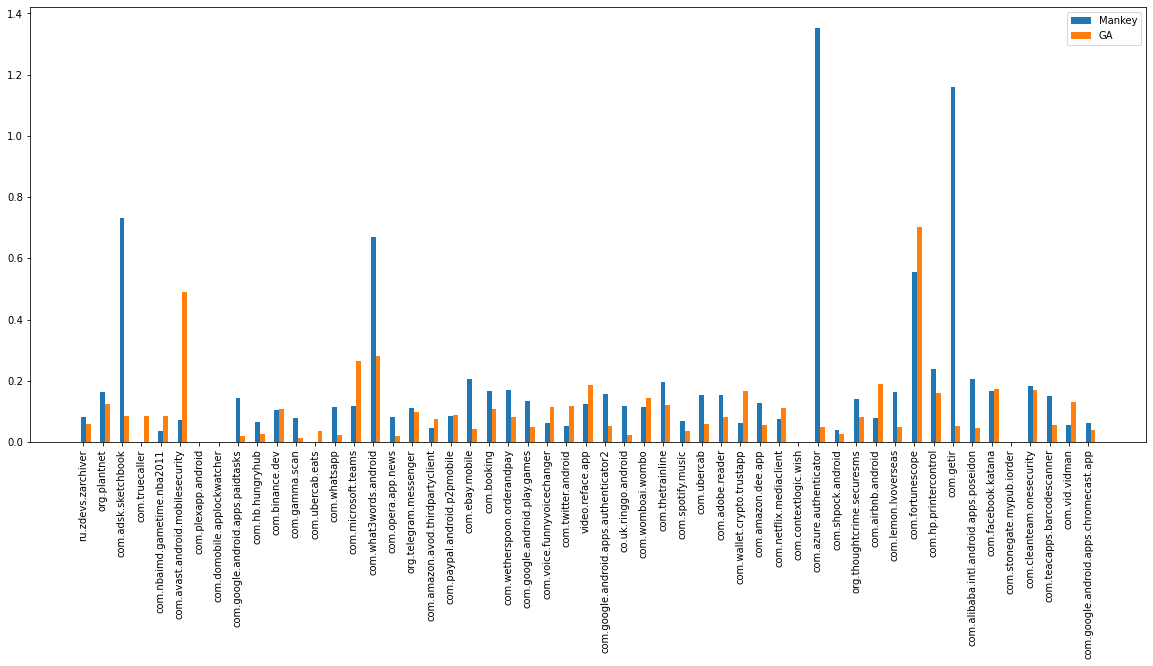

33


In [136]:
def compare_time(app_id):
    # ga = df.query(f"app=='{app_id}' & method=='ga'").drop(['app', 'method'], axis=1).transpose()
    # mk = df.query(f"app=='{app_id}' & method=='mankey'").drop(['app', 'method'], axis=1).transpose()
    # plt.plot(mk)
    # plt.plot(ga)
    # plt.title(app_id)
    # plt.legend(labels=['Mankey', 'GA'])
    # plt.show()
    mk = df.query(f"app=='{app_id}' & method=='mankey'").drop(['app', 'method'], axis=1).values.reshape(-1)
    ga = df.query(f"app=='{app_id}' & method=='ga'").drop(['app', 'method'], axis=1).values.reshape(-1)
    mk = mk[~np.isnan(mk)]
    ga = ga[~np.isnan(ga)]
    # print('mk', mk)
    # print('ga', ga)
    return (len(mk) / (mk[-1] - mk[0]), len(ga) / (ga[-1] - ga[0]))
    
ga_res = []
mk_res = []
mk_better = 0 
for app in df['app'].drop_duplicates():
    mk, ga = compare_time(app)
    if mk > ga:
        mk_better += 1
    print(ga)
    ga_res.append(ga)
    mk_res.append(mk)

apps = df['app'].drop_duplicates()
plt.figure(figsize=(20, 8))
X = np.arange(53)
plt.bar(X + 0.00, mk_res, width=0.25)
plt.bar(X + 0.25, ga_res, width=0.25)
plt.xticks(X, apps, rotation='vertical')
plt.legend(labels=['Mankey', 'GA'])
plt.show()
print(mk_better)

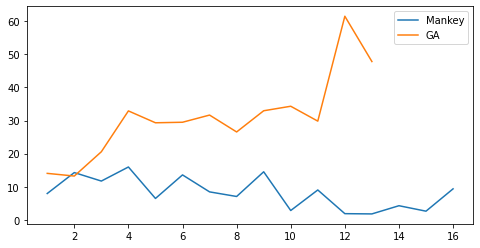

In [7]:
mean_time = df.groupby('method').mean()
ga_mean_time = mean_time[mean_time.index == 'ga'].transpose()
mankey_mean_time = mean_time[mean_time.index == 'mankey'].transpose()
plt.figure(figsize=(8, 4))
plt.plot(mankey_mean_time, label='Mankey')
plt.plot(ga_mean_time, label='GA')
plt.legend(labels=['Mankey', 'GA'])

com.superb.flashlight.apps.bright
idm.internet.download.manager
com.orangeannoe.englishdictionary
com.karolinaaleksandrova.fastramcleaner
com.lingodeer
com.siwalusoftware.dogscanner
com.lto.exam.reviewer
org.plantnet
com.ovelin.guitartuna
com.quizizz_mobile
com.bigfamily.cocomelonsong
com.xenonstudio.serversformcpe
com.kimcy929.screenrecorder
com.kitoved.skmine.topsfm
com.mathpresso.qanda
com.deepstash
com.skc.smartkidzclub
com.soomapps.screenmirroring
com.appsci.tenwords
com.noxgroup.app.cleaner
com.tocaboca.hairsalon2.iap
ru.zdevs.zarchiver
com.crone.skinsforgirls
ph.com.globe.globeathome
kr.co.smartstudy.bodlebookiapfree_us_android_googlemarket
vpn.fastvpn.freevpn
itopvpn.free.vpn.proxy
me.jagar.paraphraser
indiemcpedl.furnicraftminecraftaddon
com.getepic.Epic
com.smart.consumer.app
com.ufo.speakkorean
com.google.android.apps.adm


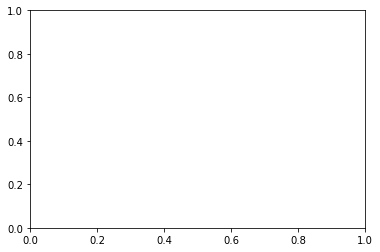

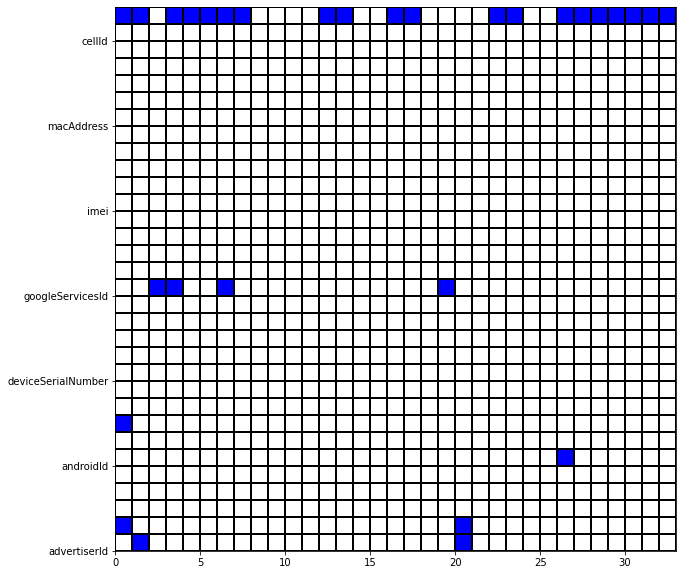

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
res = pd.read_csv('/Users/nisaruj/Desktop/vulpixii.csv')
res.drop(['version', 'androidVersion', 'error', 'testingMethod', 'createdAt', 'updatedAt', 'requesterEmail'], axis=1, inplace=True)
apps = res.applicationId
vulpix = res.vulpixScore
res = res.drop(['applicationId', 'vulpixScore'], axis=1)
pi = list(res.columns)
res = res.astype(int).transpose()
fig, ax = plt.subplots()

# define the colors
# cmap = mpl.colors.ListedColormap(['w', 'r'])

# create a normalize object the describes the limits of
# each color
# bounds = [0., 0.5, 1.]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
# plt.figure(figsize=(20,10))
# ax.set_yticklabels(pi, minor=False)
# print(pi)
# ax.imshow(res, interpolation='none', cmap=cmap)

cmap = mpl.colors.ListedColormap(['w', 'b'])
plt.figure(figsize=(20,10))
plt.pcolormesh(res, edgecolors='k', linewidth=1, cmap=cmap)
ax = plt.gca()
ax.set_yticklabels(pi, minor=False)
ax.set_aspect('equal')

for a in apps:
    print(a)